### Background

In this notebook, we will be doing a quick analysis on the dataset Median Age at First Marriage in America.

---

### Problem Statement

In this analysis, we will be studying whether Population Density have an impact on the Median Age at first marriage of women.

---

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

---

### Import Data

In [2]:
df = pd.read_csv('/content/Median Age at First Marriage .csv')
df.head()

,index,FIPS,Name,Type,TimeFrame,Median Age,Population Density per Sq Mi
0,0,1,Alabama,State,2006-2010,25.5,94.4
1,1,2,Alaska,State,2006-2010,24.8,1.2
2,2,4,Arizona,State,2006-2010,25.6,56.3
3,3,5,Arkansas,State,2006-2010,24.5,56.0
4,4,6,California,State,2006-2010,26.9,239.1


---

### Data Cleaning

In [ ]:
# number of rows and column of dataset
print(df.shape)
print('========================')
print(df.info())

(104, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         104 non-null    int64  
 1   FIPS                          104 non-null    object 
 2   Name                          104 non-null    object 
 3   Type                          104 non-null    object 
 4   TimeFrame                     104 non-null    object 
 5   Median Age                    104 non-null    float64
 6   Population Density per Sq Mi  104 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.8+ KB
None


Based on the shape and info, we can see that there is no null values. 

In [ ]:
df.TimeFrame.value_counts()

2006-2010    52
2015-2019    52
Name: TimeFrame, dtype: int64

We can see that the dataset contains data from 2006-2010 and 2015-2019.

In [ ]:
df.Type.value_counts()

State      102
Country      2
Name: Type, dtype: int64

In [ ]:
df[df['Type'] == 'Country']

,index,FIPS,Name,Type,TimeFrame,Median Age,Population Density per Sq Mi
51,51,US,United States,Country,2006-2010,26.3,87.4
103,103,US,United States,Country,2015-2019,28.0,94.8


From this, we can see that the dataset contains information about the country as a whole as well. 

In [ ]:
# keeping only columns we require
df = df[['Name','Type','TimeFrame','Median Age','Population Density per Sq Mi']]

In [ ]:
# we only want data of states
df = df[df['Type'] == 'State']

In [ ]:
# drop 'type' column as we do not need it 
df.drop(columns=['Type'], inplace=True)

---

### Data Dictionary

|Column Name|Dtype|About|
|---|---|---|
|Name|object|Name of State in America|
|TimeFrame|object|Data from 2006-2010 or 2015-2019|
|Median Age|float|Median Age at First Marriage of Women|
|Population Density per Sq Mi|float|Population Density per Sq Mi|

---

### Exploratory Data Analysis

##### **Distributions**

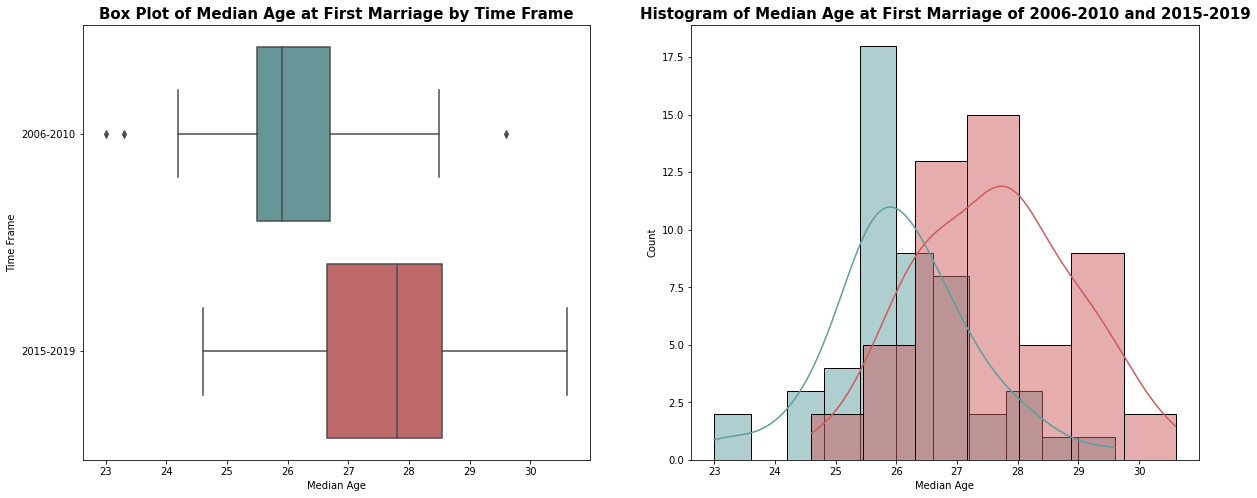

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
color = {'2006-2010':"cadetblue",'2015-2019':'indianred'}
sns.boxplot(x=df['Median Age'], y =df['TimeFrame'],palette=color)
plt.title('Box Plot of Median Age at First Marriage by Time Frame', fontsize=15, fontweight='bold')
plt.ylabel('Time Frame')

plt.subplot(1,2,2)
sns.histplot(x=df['Median Age'].loc[df['TimeFrame'] == '2006-2010'], kde=True, color='cadetblue')
sns.histplot(x=df['Median Age'].loc[df['TimeFrame'] == '2015-2019'], kde=True, color='indianred')
plt.title('Histogram of Median Age at First Marriage of 2006-2010 and 2015-2019', fontsize=15, fontweight='bold')

plt.show()

According to the plots above, we can see that for 2006 to 2010, the datapoints are less spread out as compared to 2015 to 2019. This means that there is **more variation in the age women choose to have their first marriage**.

We also can see that there is an increase in the median of the median of age at first marriage. The median increased from approximately 26 to approximately 28. From this, I can infer that **more women are choosing to have their first marriage at a later age**. 

There are outliers from 2006 to 2010. Based on the boxplot, we can see that there are four states with the median of age at first marriage numerically distant from the rest of the medians. However in 2015-2019 we see that there are no outliers. This means that the distribution is starting to be more inclusive as the spread of data gets wider. 

##### **Correlations**

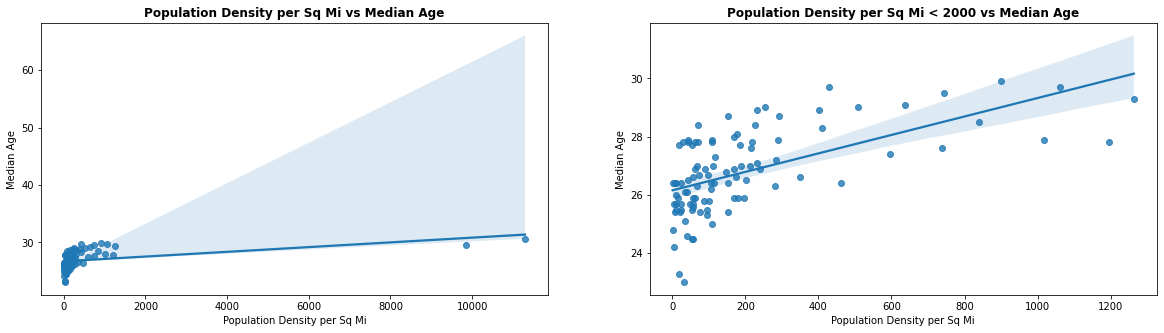

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.regplot(data=df, x='Population Density per Sq Mi', y='Median Age')
plt.title('Population Density per Sq Mi vs Median Age', fontweight='bold')

plt.subplot(1,2,2)
sns.regplot(data=df.loc[df['Population Density per Sq Mi'] < 2000], x='Population Density per Sq Mi', y='Median Age')
plt.title('Population Density per Sq Mi < 2000 vs Median Age', fontweight='bold')

plt.show()


In [ ]:
# correlation coefficients
df.corr()

,Median Age,Population Density per Sq Mi
Median Age,1.000000,0.413896
Population Density per Sq Mi,0.413896,1.000000


Based on the regression plot above, we can see that there is a **positive correlation** between population density per sq mi and median age. However, it is **not necessarily a strong postitive correlation** as the correlation coefficient is only 0.41. 

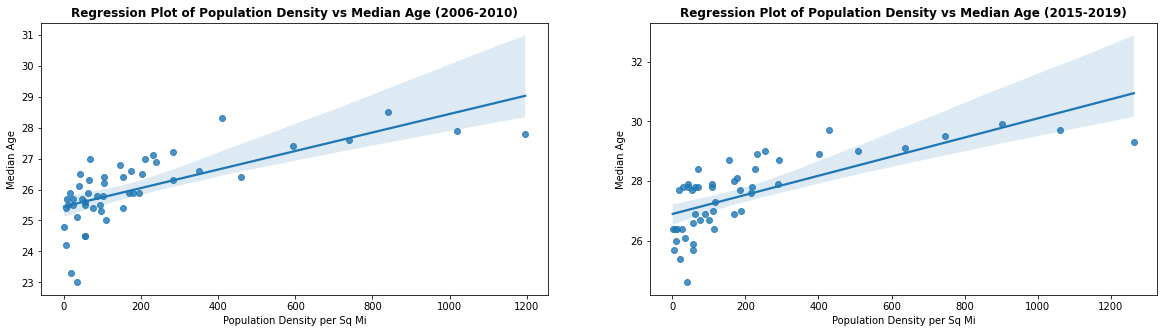

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.regplot(data=df[(df['TimeFrame'] == '2006-2010') & (df['Population Density per Sq Mi'] < 2000)], x='Population Density per Sq Mi', y='Median Age')
plt.title('Regression Plot of Population Density vs Median Age (2006-2010)', fontweight='bold')

plt.subplot(1,2,2)
sns.regplot(data=df[(df['TimeFrame'] == '2015-2019') & (df['Population Density per Sq Mi'] < 2000)], x='Population Density per Sq Mi', y='Median Age')
plt.title('Regression Plot of Population Density vs Median Age (2015-2019)', fontweight='bold')

plt.show()

It is definitely interesting to see that as population density per sq mi increase, the median age at first marriage increases. This could signify that as youths have more choices, they may be less likely to settle down early. 

Also as technology improves over the years, youths also have access to dating applications such as Tinder. This means that people may not be limited to selecting candidates from the state that they reside in as dating applications allows users to set their search distance to many kilometers away. Which could be a possible cause for the increase in variation and median age women have their first marriage in states with population density per sq mi of less than 200.

In addition, with feminism and gender equality gaining traction over the years, it also serves as a factor for the increase in median age at first marriage.

In [ ]:
df[df['TimeFrame'] == '2006-2010'].corr()

,Median Age,Population Density per Sq Mi
Median Age,1.000000,0.523611
Population Density per Sq Mi,0.523611,1.000000


In [ ]:
df[df['TimeFrame'] == '2015-2019'].corr()

,Median Age,Population Density per Sq Mi
Median Age,1.000000,0.438343
Population Density per Sq Mi,0.438343,1.000000


We can see that the correlation coefficient of population density per sq mi vs median age went down by 0.08. This means that increase in population density per sq mi have a lesser impact on the median age.

---

### Conclusion & Recommendations

**Conclusion**

In conclusion, from this short analysis, we found out that population density has an impact on median age women choose to get married. However, the **impact is not that significant**. Over the years, as factors such as **dating applications** and **feminism and gender equality movements** becoming more prevalent, the **correlation between population density and median age at first marriage would definitely get weaker and weaker**. 


**Recommendation**

1) In the future, we could definitely scale up this analysis by using other related datasets and we could study whether there are other factors that could contribute to the movements in median age at first marriage.

2) If we were able to gather more factors that could contribute to the movements in median age at first marriage, we could also train a machine learning model to forecast what the median age at first marriage for women in the future.

---